# Problem Statement

We need to categorize our purchazed items, we know them as a text in multilingual form.

Let's dig into this notebook to see how to solve this challengs 🧐

first will set my environment

# Setting up the environment

In [5]:
%pip install langdetect

  Using cached langdetect-1.0.9-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --quiet deep-translator

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --quiet langchain-community

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bentoml 1.3.8 requires opentelemetry-api==1.20.0, but you have opentelemetry-api 1.28.2 which is incompatible.
bentoml 1.3.8 requires opentelemetry-instrumentation==0.41b0, but you have opentelemetry-instrumentation 0.49b2 which is incompatible.
bentoml 1.3.8 requires opentelemetry-instrumentation-asgi==0.41b0, but you have opentelemetry-instrumentation-asgi 0.49b2 which is incompatible.
bentoml 1.3.8 requires opentelemetry-sdk==1.20.0, but you have opentelemetry-sdk 1.28.2 which is incompatible.
bentoml 1.3.8 requires opentelemetry-semantic-conventions==0.41b0, but you have opentelemetry-semantic-conventions 0.49b2 which is incompatible.
bentoml 1.3.8 requires opentelemetry-util-http==0.41b0, but you have opentelemetry-util-http 0.49b2 which is incompatible.
docling 2.8.1 requires pydantic<2.10,>=2.0.0, but you h

In [4]:
%pip install --quiet langchain-huggingface

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install --upgrade --quiet huggingface_hub

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
docling 2.8.1 requires pydantic<2.10,>=2.0.0, but you have pydantic 2.10.6 which is incompatible.


In [15]:
%pip install --quiet matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install -U langchain-ollama

In [34]:
%pip install --quiet nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from deep_translator import GoogleTranslator
from langdetect import detect
from langsmith import traceable
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

load_dotenv()

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
LANGSMITH_TRACING = os.getenv('LANGSMITH_TRACING')
LANGSMITH_API_KEY = os.getenv('LANGSMITH_API_KEY')

# Data

typical data loading and will look closer to the columns.. 

In [8]:
df = pd.read_excel('./data/purchase-order-items.xlsx', engine='openpyxl')

In [9]:
df

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN


Certainly the Item Name column will need most of the work but I'd like to do some EDA for the rest of the columns first..

## EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Item Name          2910 non-null   object 
 2   Quantity           3150 non-null   float64
 3   Total Bcy          3150 non-null   float64
 4   Sub Total Bcy      3150 non-null   float64
 5   Purchase Order ID  3150 non-null   int64  
 6   Product ID         2910 non-null   float64
 7   Currency Code      3150 non-null   object 
 8   Account ID         3150 non-null   int64  
 9   Tax ID             3085 non-null   float64
 10  Project ID         0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 270.8+ KB


In [12]:
# since Project ID is all missing
df = df.drop('Project ID', axis=1)

In [ ]:
print(f"The number of unique Item IDs is: {len(df['Item ID'].unique())}")

The number of unique Item IDs is: 3150


### Currency column

In [ ]:
print(df['Currency Code'].value_counts())

Currency Code
SAR    3085
USD      65
Name: count, dtype: int64


### Bcy columns

In [ ]:
(df["Total Bcy"] == df["Sub Total Bcy"]).all()

False

In [ ]:
Bcy = df[df["Total Bcy"] != df["Sub Total Bcy"]][['Total Bcy','Sub Total Bcy']]

In [ ]:
df[df["Total Bcy"] == df["Sub Total Bcy"]]['Currency Code'].value_counts()

,count
Currency Code,
SAR,3070
USD,65


In [ ]:
df[df["Total Bcy"] < df["Sub Total Bcy"]]['Currency Code'].value_counts()

,count
Currency Code,
SAR,15


In [ ]:
# group by 'Currency Code' and get the sum of 'Sub Total Bcy' and 'Total Bcy'
df.groupby('Currency Code').agg({'Sub Total Bcy': 'sum', 'Total Bcy': 'sum'})


,Sub Total Bcy,Total Bcy
Currency Code,,
SAR,1.515562e+08,1.515500e+08
USD,1.347573e+06,1.347573e+06


So, we have 2 conditions:

1. Sub Total Bcy and Total Bcy are equal in all USD and most of SAR	(3070 transaction)
2. Sub Total Bcy is greater than Total Bcy is minority in SAR

That likely means:

- For all USD transactions and most SAR transactions, Sub Total Bcy == Total Bcy. This suggests that in these cases, no additional deductions (like taxes, discounts, or fees) are applied.
- For a minority of SAR transactions, Sub Total Bcy > Total Bcy, meaning something (like a discount or adjustment) reduces the total from the subtotal.

We can explore this further by checking the taxes but we only have the Tax ID column.

For future modeling we can use only 1 column of them to avoid multicollinearity and redundancy.

### Quantity

count     3150.000000
mean       475.470797
std       2737.024475
min          0.150000
25%          7.000000
50%         30.000000
75%        130.000000
max      70000.000000
Name: Quantity, dtype: float64


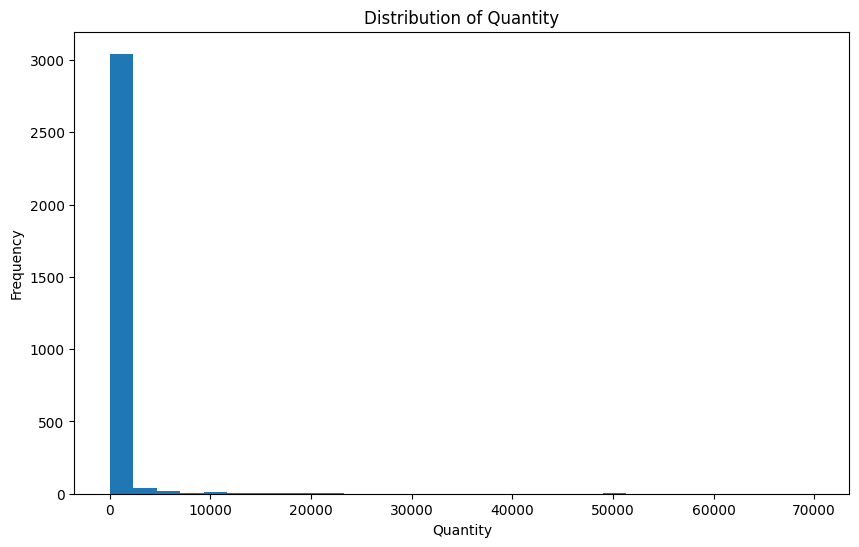

Number of zero quantities: 0
Number of negative quantities: 0


In [18]:
# prompt: explore Quantity	column

# Explore the 'Quantity' column
print(df['Quantity'].describe())
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

print(f"Number of zero quantities: {len(df[df['Quantity'] == 0])}")
print(f"Number of negative quantities: {len(df[df['Quantity'] < 0])}")


In [50]:
df['Quantity'] = df['Quantity'].round()

# Item Name

In [19]:
df['Item Name'].value_counts()

Item Name
حديد سابك 16 ملم 12 م               13
حديد تسليح اتفاق 14مم 12متر         11
حديد تسليح اتفاق 16مم 12متر         11
حديد تسليح اتفاق 20مم 12متر         11
حديد تسليح سابك مسحوب 6 متر 8 مم     9
                                    ..
lra 93                               1
قزاز 58 شمعه ابيض                    1
تيمر مكيف                            1
فيست جاكت                            1
ITTIFAQ STEEL 12mm, 12 meter         1
Name: count, Length: 2302, dtype: int64

In [24]:
def detect_language(text):
    try:
        results = detect(text)
        return results
    except:
        return "unknown"



In [25]:
df['language'] = df['Item Name'].apply(detect_language)

In [26]:
df[df['language'] == 'ar']

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,language
240,3263831000000763264,ماسورة حديد مقاس 1.5 بوصة سماكة 2.8 مم طول 6 م,11.0,462.0,462.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
242,3263831000000763280,ماسورة حديد مقاس 1 بوصة سماكة 1.5 مم طول 6 م,100.0,3600.0,3600.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
243,3263831000000763258,صاج حديد أسود مقاس 1000*2000 مم سماكة مم 9.80,4.0,1740.0,1740.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
244,3263831000000763266,مستطيل حديد مقاس 20*30 مم سماكة 1.5 مم طول 6 م,44.0,1188.0,1188.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
250,3263831000000763278,مربع حديد مقاس 16*16 مم سماكة 1.5 مم طول 6 م,25.0,500.0,500.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
...,...,...,...,...,...,...,...,...,...,...,...
3139,3263831000008909247,حديد تسليح سعودي سابك 14 مم * 12 م,30.0,69000.0,69000.0,3263831000008909243,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
3142,3263831000010242142,حديد تسليح سابك سعودي 12 * 94 سيخ / طن,30.0,69000.0,69000.0,3263831000010242136,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar


In [ ]:
def translate_text(text, target='en'):
    translated = GoogleTranslator(source='auto', target=target).translate(text)
    return translated

In [ ]:
df['translated_item_name'] = df.apply(lambda row: translate_text(row['Item Name'], target='en') if row['language'] == 'ar' else row['Item Name'], axis=1)

In [ ]:
#as it took time
df.to_csv('./purchase-order-items-with-translation.csv', index=False)

In [27]:
df = pd.read_csv('./data/purchase-order-items-with-translation.csv')

In [28]:
exp_df = df[['translated_item_name']]

In [29]:

exp_df = exp_df.dropna(subset=['translated_item_name'])


In [30]:

exp_df = exp_df.drop_duplicates(subset=['translated_item_name'])


In [31]:
exp_df

,translated_item_name
233,HEB 200X200X15X9MMX12MTR
234,HEB 280X280X10.5X18MMX12MTR
235,IPE 300X150X7.1X10.7X12MTR
236,HEB 260X260X10X17.5MMX12MTR
237,Corrugated Sheet 1x6 mtr x 0.50 mm
...,...
3142,Saudi SABIC armament iron 12 * 94 cm / ton
3143,"ITTIFAQ STEEL 16mm, 12 meter"
3144,"ITTIFAQ STEEL 20mm, 12 meter"
3145,"ITTIFAQ STEEL 14mm, 12 meter"


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower() # lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    words = word_tokenize(text) # tokenization
    words = [w for w in words if not w in stop_words] # remove stopwords
    text = " ".join(words)
    return text

exp_df['cleaned_translated_item_name'] = exp_df['translated_item_name'].apply(clean_text)


In [ ]:
exp_df

I don't think it has a difference for a pre-processing for LLM..

In [36]:

import json
translated_item_names = exp_df['translated_item_name'].tolist()

data_dict = {'translated_item_names': translated_item_names}

json_data = json.dumps(data_dict, indent=4) # Use indent for pretty printing.


In [55]:
with open('./data/item_names.json', 'w') as json_file:
    json_file.write(json_data)

In [37]:
translated_item_names

['HEB 200X200X15X9MMX12MTR',
 'HEB 280X280X10.5X18MMX12MTR',
 'IPE 300X150X7.1X10.7X12MTR',
 'HEB 260X260X10X17.5MMX12MTR',
 'Corrugated Sheet 1x6 mtr x 0.50 mm',
 'B.SHEET 1.5X6 MTRX20 MM',
 'GI Sheet 1000 x 3000 x 1.2 mm (1758)',
 'Iron 1.5 -inch steel 2.8 mm thick 6 m',
 'HR Sheet 5.8x1000x2000mm',
 'Iron 1 inch steel 1.5 mm in length 6 m',
 'Black iron sheet size 1000*2000 mm thick mm 9.80',
 'Iron rectangle size 20*30 mm thick 1.5 mm length 6 m',
 'HR Sheet 3.0x1000x2000mm',
 'HR Sheet 1.5x1220x2440mm',
 'Tube 40x40x1.20x6000MM',
 'Pipe 1.25 inch x 1.5 x 6000 mm',
 'HR Sheet 7.80x1000x2000mm',
 'Iron box size 16*16 mm thick 1.5 mm length 6 m',
 'Monster Milm 10*6000 mm',
 'Simple iron 40*8*6000 mm',
 'Tube 25x25x1.2x6000mm',
 'GI Wire Mesh 12x12x1MM (ROLL)',
 'Expansion Bolt M12x150MM',
 'HDG Angel 65x65x6mm, 6M',
 'HDG Stiffiner Plate 50x50x5MM',
 'HDG Grating 1000 mm x 6000mm, PLAIN, open ends, panels, Mesh sizes 30 mm x 100 mm (center to center)',
 'HDG Angel 90x90x6MM Long 130

In [39]:
from langchain_ollama.llms import OllamaLLM


In [51]:
model = OllamaLLM(model="llama3.2")

In [52]:
model

OllamaLLM(model='llama3.2')

In [38]:
!huggingface-cli login

^C


In [ ]:
from langchain_community.llms import HuggingFaceEndpoint

In [ ]:
from getpass import getpass

HUGGINGFACEHUB_API_TOKEN = getpass()

In [ ]:
import os

os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [44]:
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

In [ ]:
repo_id = "meta-llama/Llama-3.1-405B-Instruct"

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    task="text-generation",
    max_new_tokens=1000,
    temperature=0.5,
    huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
)

In [ ]:

response1_categories = [
    'Beam and Column Reinforcement',
    'Plates and Sheets',
    'Structural Steel Sections',
    'Fastenings and Fixings',
    'Cables and Wires',
    'Thermal Insulation',
    'Rebar',
    'Concrete Accessories',
    'Miscellaneous Items'
]


In [41]:
# prompt: divide list to lists of len 200

def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

# How many elements each
# list should have
n = 200

translated_item_names_chunks = list(divide_chunks(translated_item_names, n))


In [42]:
len(translated_item_names_chunks)

12

In [45]:
instruction = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a highly intelligent AI assistant. Your task is to categorize a given list of purchased items into well-defined, logical taxonomies.

### Instructions:
- **Input:** A list of item names purchased by customers.
- **Your Output:** A structured list of category titles that logically group the items.

### Guidelines:
1. **Identify common themes** among items and create appropriate category names.
2. **Ensure categories are broad but meaningful** (e.g., "Electronics" instead of "Smartphones").
3. **If needed, create subcategories** for better organization.
4. **Be adaptive:** If you recognize well-known industry-standard categories, use them.

### Data:
- **Purchased Items:** {translated_item_names}

Return only the final list of categories as a structured response.
"""



prompt = PromptTemplate.from_template(instruction)

In [53]:
llm_chain = prompt | model
response = llm_chain.invoke({"translated_item_names": translated_item_names_chunks[0]})
response

'Here is the list of items with their respective categories:\n\n**Building Materials**\n\n* Hollow Core Slab, 200mm thick (UNIT: M2)\n* Concrete Water Tank, 21 cubic meter\n* HR Sheet, 16 mm\n* HR Sheet A36 - 1.50 x1220 mm\n* IPE 300*150*7.10.7 MM *12MTRI.5 20mm\n* HR Coil, 2.00x1000 mm\n\n**Fasteners**\n\n* Anchor Bolt 8*10*40 (Unit: Each)\n* Self Drilling Flat Head Screw M4 x 12mm\n* S.S Chain 1MM (Unit: Mtr\n* Sinck\n\n**Welding and Metalworking**\n\n* Welding Spray AS-90 Black \n* Welding Disc 115mm \n* GrindDisc, 6.5 mm Heavy duty  (Unit: Each)'

'Here is the list of items with their respective categories:\n\n**Building Materials**\n\n* Hollow Core Slab, 200mm thick (UNIT: M2)\n* Concrete Water Tank, 21 cubic meter\n* HR Sheet, 16 mm\n* HR Sheet A36 - 1.50 x1220 mm\n* IPE 300*150*7.10.7 MM *12MTRI.5 20mm\n* HR Coil, 2.00x1000 mm\n\n**Fasteners**\n\n* Anchor Bolt 8*10*40 (Unit: Each)\n* Self Drilling Flat Head Screw M4 x 12mm\n* S.S Chain 1MM (Unit: Mtr\n* Sinck\n\n**Welding and Metalworking**\n\n* Welding Spray AS-90 Black \n* Welding Disc 115mm \n* GrindDisc, 6.5 mm Heavy duty  (Unit: Each)'


In [54]:
response2 = llm_chain.invoke({"translated_item_names": translated_item_names_chunks[1]})
response2

'Here are the 25 categories extracted from the text with their corresponding tags:\n\n**1. Solar Panels**\n  - Trina Solar Panels Mono PERC DE19 Model: DE19\n\n**2. Welding & Clamps**\n- WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC\n  - WSC 72-81R\n  - WEICCO U STRAP MODEL\n  - US 75 (2-1/2")\n\n**3. Fasteners & Fixings**\n- Hex Bolt H D G A325\n  - HEX BOLT H D G F436 \n  - BOLT, NUT & WASH\n   - STAR Duct Sealant DS-32-17\n  - GARG HDG WASHER M8INDIA  - \n    STEEL RODS 20mm\n\n**4. Steel & Iron**\n-  STEEL ARMMENT FOR SOLAR PANEls MONOLayer panel roof rails\n\n **5. Hardware - Pipe**\n- GALVANIZED ANGLE BAR\n  - G90\n\n   40X40 \n\n6. Roofing & Building Materials**\n - 10mm ppg bronz tinted clear temp\n7. **Cable**\n- 32amp\n8. \n **9. Adhesives & Sealants**\n- STAR Ductant sealant \n- 1000mm Epsom Sealing**\n\n**10. Electrical Cables**\n- 25 Ml \n\n11. Pipe \n12. Fastenings and Bolts \n13. Roofing \n14. Solar Panel \n15. Wire\n16. Concrete \n17. Roof Top \n18. Structure \n19. Solar \

'Here are the 25 categories extracted from the text with their corresponding tags:\n\n**1. Solar Panels**\n  - Trina Solar Panels Mono PERC DE19 Model: DE19\n\n**2. Welding & Clamps**\n- WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC\n  - WSC 72-81R\n  - WEICCO U STRAP MODEL\n  - US 75 (2-1/2")\n\n**3. Fasteners & Fixings**\n- Hex Bolt H D G A325\n  - HEX BOLT H D G F436 \n  - BOLT, NUT & WASH\n   - STAR Duct Sealant DS-32-17\n  - GARG HDG WASHER M8INDIA  - \n    STEEL RODS 20mm\n\n**4. Steel & Iron**\n-  STEEL ARMMENT FOR SOLAR PANEls MONOLayer panel roof rails\n\n **5. Hardware - Pipe**\n- GALVANIZED ANGLE BAR\n  - G90\n\n   40X40 \n\n6. Roofing & Building Materials**\n - 10mm ppg bronz tinted clear temp\n7. **Cable**\n- 32amp\n8. \n **9. Adhesives & Sealants**\n- STAR Ductant sealant \n- 1000mm Epsom Sealing**\n\n**10. Electrical Cables**\n- 25 Ml \n\n11. Pipe \n12. Fastenings and Bolts \n13. Roofing \n14. Solar Panel \n15. Wire\n16. Concrete \n17. Roof Top \n18. Structure \n19. Solar \n20. Welding\n21. Hardware\n\n22. Steel Bars \n23. Concrete Cables \n24. Aluminum \n\n25. Roofing Adhesives'

In [58]:
final_categories = [
    "Metals & Steel",
    "Construction Materials",
    "Electrical & Lighting",
    "Plumbing & HVAC",
    "Security & Access Control",
    "Tools & Hardware",
    "Office & Furniture",
    "Safety & Fire Protection",
    "Miscellaneous & Logistics"
]


In [59]:
len(final_categories)

9

In [68]:
Items_df = df[['Item ID', 'translated_item_name']]

In [69]:
Items_df.dropna(inplace=True)

In [70]:
items_dict = Items_df.set_index('Item ID')['translated_item_name'].to_dict()
items_dict

{3263831000000763127: 'HEB 200X200X15X9MMX12MTR',
 3263831000000763149: 'HEB 280X280X10.5X18MMX12MTR',
 3263831000000763145: 'IPE 300X150X7.1X10.7X12MTR',
 3263831000000763143: 'HEB 260X260X10X17.5MMX12MTR',
 3263831000000763151: 'Corrugated Sheet 1x6 mtr x 0.50 mm',
 3263831000000763147: 'B.SHEET 1.5X6 MTRX20 MM',
 3263831000000763256: 'GI Sheet 1000 x 3000 x 1.2 mm (1758)',
 3263831000000763264: 'Iron 1.5 -inch steel 2.8 mm thick 6 m',
 3263831000000763272: 'HR Sheet 5.8x1000x2000mm',
 3263831000000763280: 'Iron 1 inch steel 1.5 mm in length 6 m',
 3263831000000763258: 'Black iron sheet size 1000*2000 mm thick mm 9.80',
 3263831000000763266: 'Iron rectangle size 20*30 mm thick 1.5 mm length 6 m',
 3263831000000763274: 'HR Sheet 3.0x1000x2000mm',
 3263831000000763282: 'HR Sheet 1.5x1220x2440mm',
 3263831000000763254: 'Tube 40x40x1.20x6000MM',
 3263831000000763262: 'Pipe 1.25 inch x 1.5 x 6000 mm',
 3263831000000763270: 'HR Sheet 7.80x1000x2000mm',
 3263831000000763278: 'Iron box size 

In [71]:
import json

with open('./data/items_dict.json', 'w') as json_file:
    json.dump(items_dict, json_file, indent=4)

In [ ]:
instruction = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a highly intelligent AI assistant. Your task is to **match each purchased item** to the **one most relevant category** from a predefined list.

### **Instructions:**
- **Input:**
  - An item names.
  - A list of predefined categories.
- **Output:**
  - A category string only without any additional clarification mapping each **item ID** to its **best-matching category** from the provided list.

### **Guidelines:**
1. **Assign the most relevant category** based on the item's function, characteristics, or industry-standard classifications.
2. **Do not create new categories**—use only the provided list.
3. **Ensure every item is categorized**, even if some items are ambiguous (assign them to the closest fit).

### **Data:**
- **Items Name:** {translated_item_name}   
- **Predefined Categories:** {final_categories}
   """


prompt = PromptTemplate.from_template(instruction)

In [73]:
llm_chain = prompt | model

In [75]:
def categorize_item(row):
    item_name = row['translated_item_name']
    response = llm_chain.invoke({"translated_item_name": item_name, "final_categories": final_categories})
    return response



In [76]:
Items_df['category'] = Items_df.head(5).apply(categorize_item, axis=1)

In [77]:
Items_df

,Item ID,translated_item_name,category
233,3263831000000763127,HEB 200X200X15X9MMX12MTR,"Based on the item name ""HEB 200X200X15X9MMX12M..."
234,3263831000000763149,HEB 280X280X10.5X18MMX12MTR,Based on the provided item name and predefined...
235,3263831000000763145,IPE 300X150X7.1X10.7X12MTR,Based on the item name IPE 300X150X7.1X10.7X12...
236,3263831000000763143,HEB 260X260X10X17.5MMX12MTR,Based on the item name HEB 260X260X10X17.5MMX1...
237,3263831000000763151,Corrugated Sheet 1x6 mtr x 0.50 mm,"Based on the item name, I would categorize it ..."
...,...,...,...
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",NaN
3147,3263831000016208289,"Iron, a Saudi, SABIC reinforcement, 16 mm * 12 m",NaN
3148,3263831000016208285,Iron Armile Saudi SABIC 12 mm * 12 m,NaN
